# Pima Indians Diabetes Analysis
---

### Problem Statement
**Analyze** different aspects of diabetes in the Pima Indians tribe by doing exploratory data analysis and **predicting future cases** based on a given set of parameters.

### 1. Import Python libraries

In [82]:
# import libraries for data manipulation and math calculations
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.tree import plot_tree

# import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler

# import libraries for model building, training, and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# import sklear libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

# import warnings library to silence some obsolete elements, such as keyword, function or class, etc.
import warnings
warnings.filterwarnings("ignore")


### 2. Import Dataset

In [42]:
df = pd.read_csv("dataset/diabetes.csv")
df.head()

# Dataset attributes (columns) information:

#    Pregnancies: Number of times pregnant
#    Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
#    BloodPressure: Diastolic blood pressure (mm Hg)
#    SkinThickness: Triceps skin fold thickness (mm)
#    Insulin: 2-Hour serum insulin (mu U/ml)
#    BMI: Body mass index (weight in kg/(height in m)^2)
#    DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
#    Age: Age in years
#    Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Observation:**

- There are **nine (9) columns** in the dataset. All numeric values
- Column *Outcome* is the target variable. It's type is Categorical/Binary


### 3. Exploratory Data Analysis

#### *a. Dataset description*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observation:** 
1. No empty cells. 
2. All numrics values. 
3. 768 observations

In [4]:
df.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


**Observation:**

1.	There are several columns with '0' as min. This indicates that maybe that data point was not collected for the observation and the cell was filled with '0'. 
2.	Scales between variables are very different. May affect algorithms performance. 

In [5]:
np.ptp(df, axis = 0)

Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
Outcome                       1.000
dtype: float64

**Observation:** As may be seen, scales or ranges are very different. This situation will be addressed with normalization in data preprocessing stages.

#### *b. Univariate Analysis*

Pregnancies
Skew : 0.9


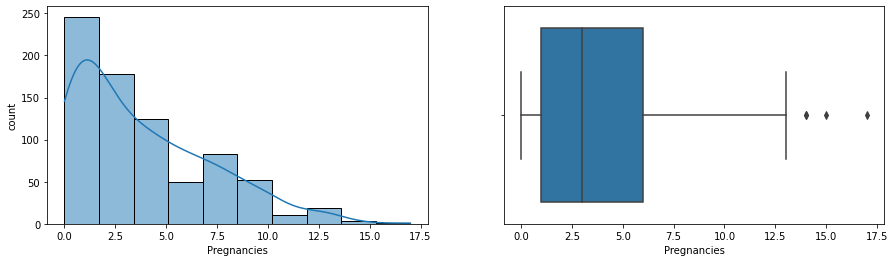

Glucose
Skew : 0.17


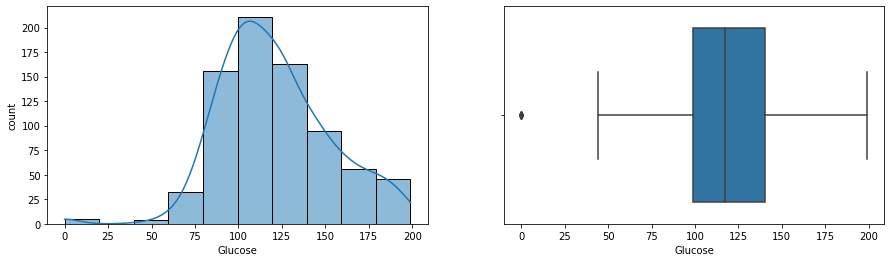

BloodPressure
Skew : -1.84


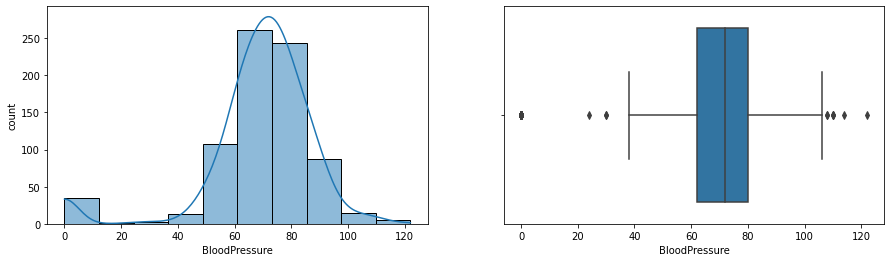

SkinThickness
Skew : 0.11


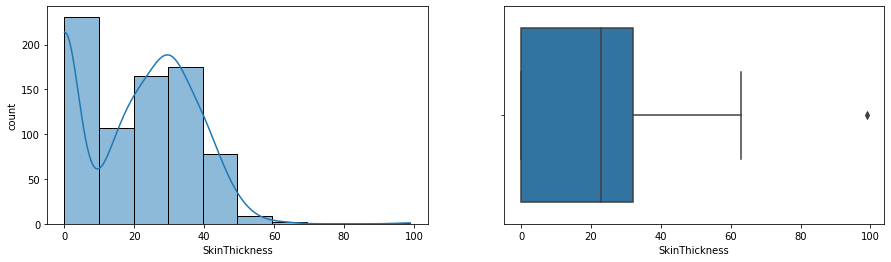

Insulin
Skew : 2.27


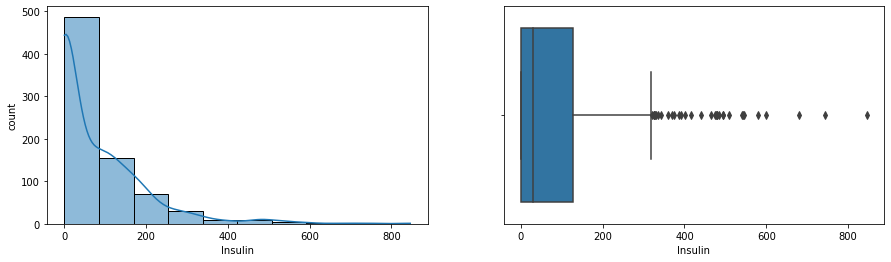

BMI
Skew : -0.43


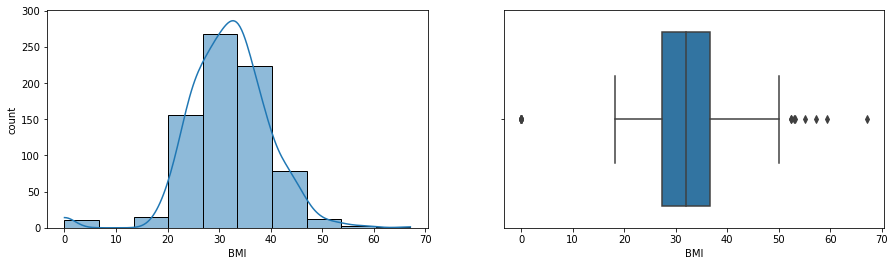

DiabetesPedigreeFunction
Skew : 1.92


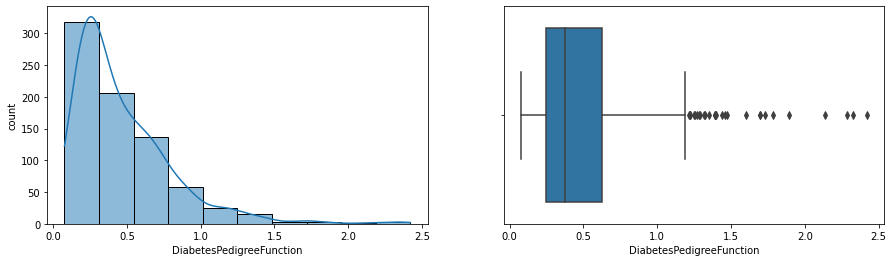

Age
Skew : 1.13


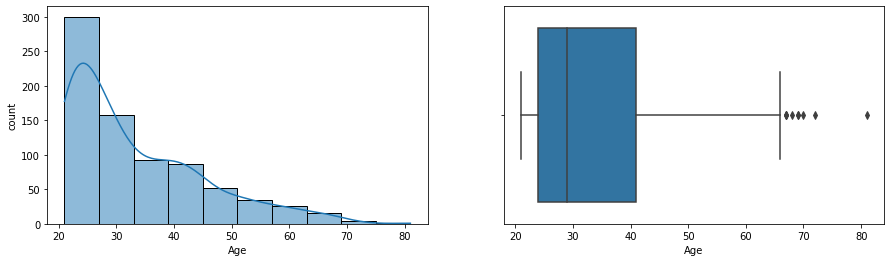

In [6]:
for col in df.iloc[:, :-1].columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    
    # Bar plot
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    #data[col].hist(bins=10, grid=False)
    sns.histplot(data = df, x = col, kde = True, bins = 10)
    plt.ylabel('count')
        
    # Box plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

#### *c. Bivariate Analysis*

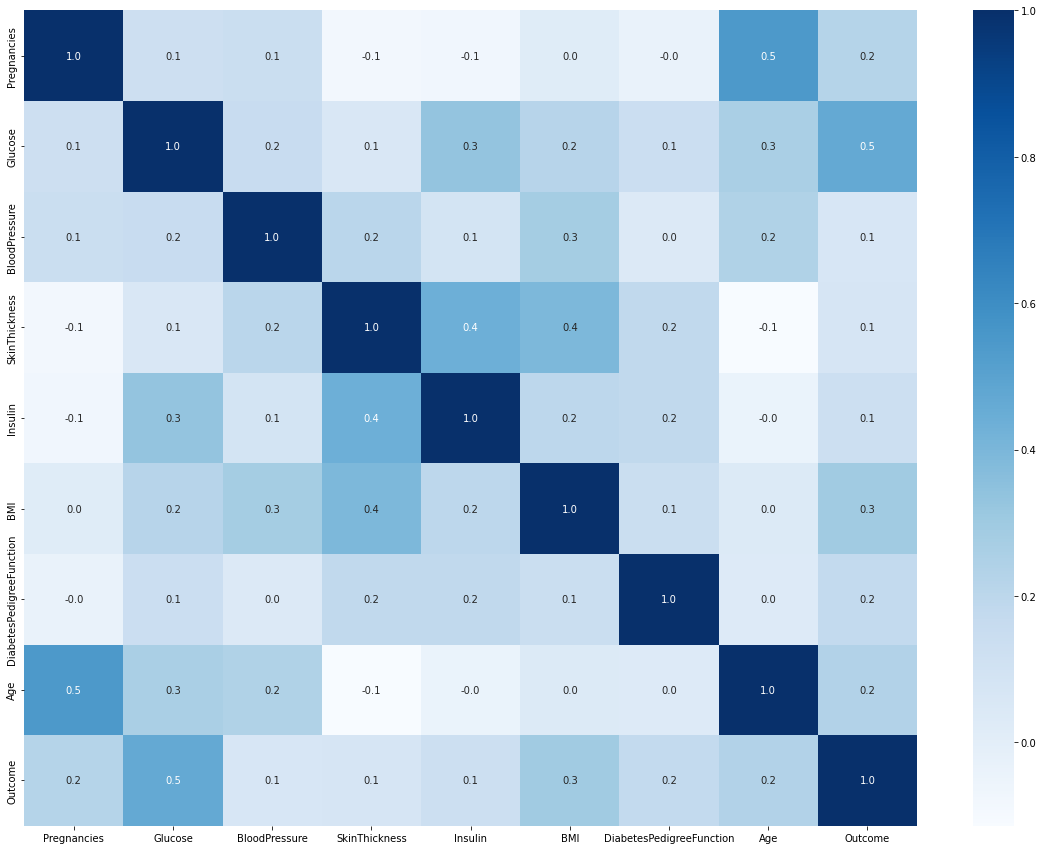

In [7]:
# Correlation 
# --------------------------------------
# Statistical technique that shows how two variables are related. It is used to find the pairwise 
# correlation of all columns in the dataframe. Any non-numeric data type columns in the 
# dataframe is ignored.

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, fmt='.1f', cmap = 'Blues')
plt.show()

**Observation**

With relation to the ‘Outcome’ (target variable), variables/predictors **Glucose, BMI, and Age** show a small positive relationship. They may be consider as good predictors.  

In [63]:
df.groupby('Outcome').mean().transpose()

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


**Observation:**

- Look like on average(mean) Glucose, Insulin, BMI, and AGE have higher values for women with Diabetes.  


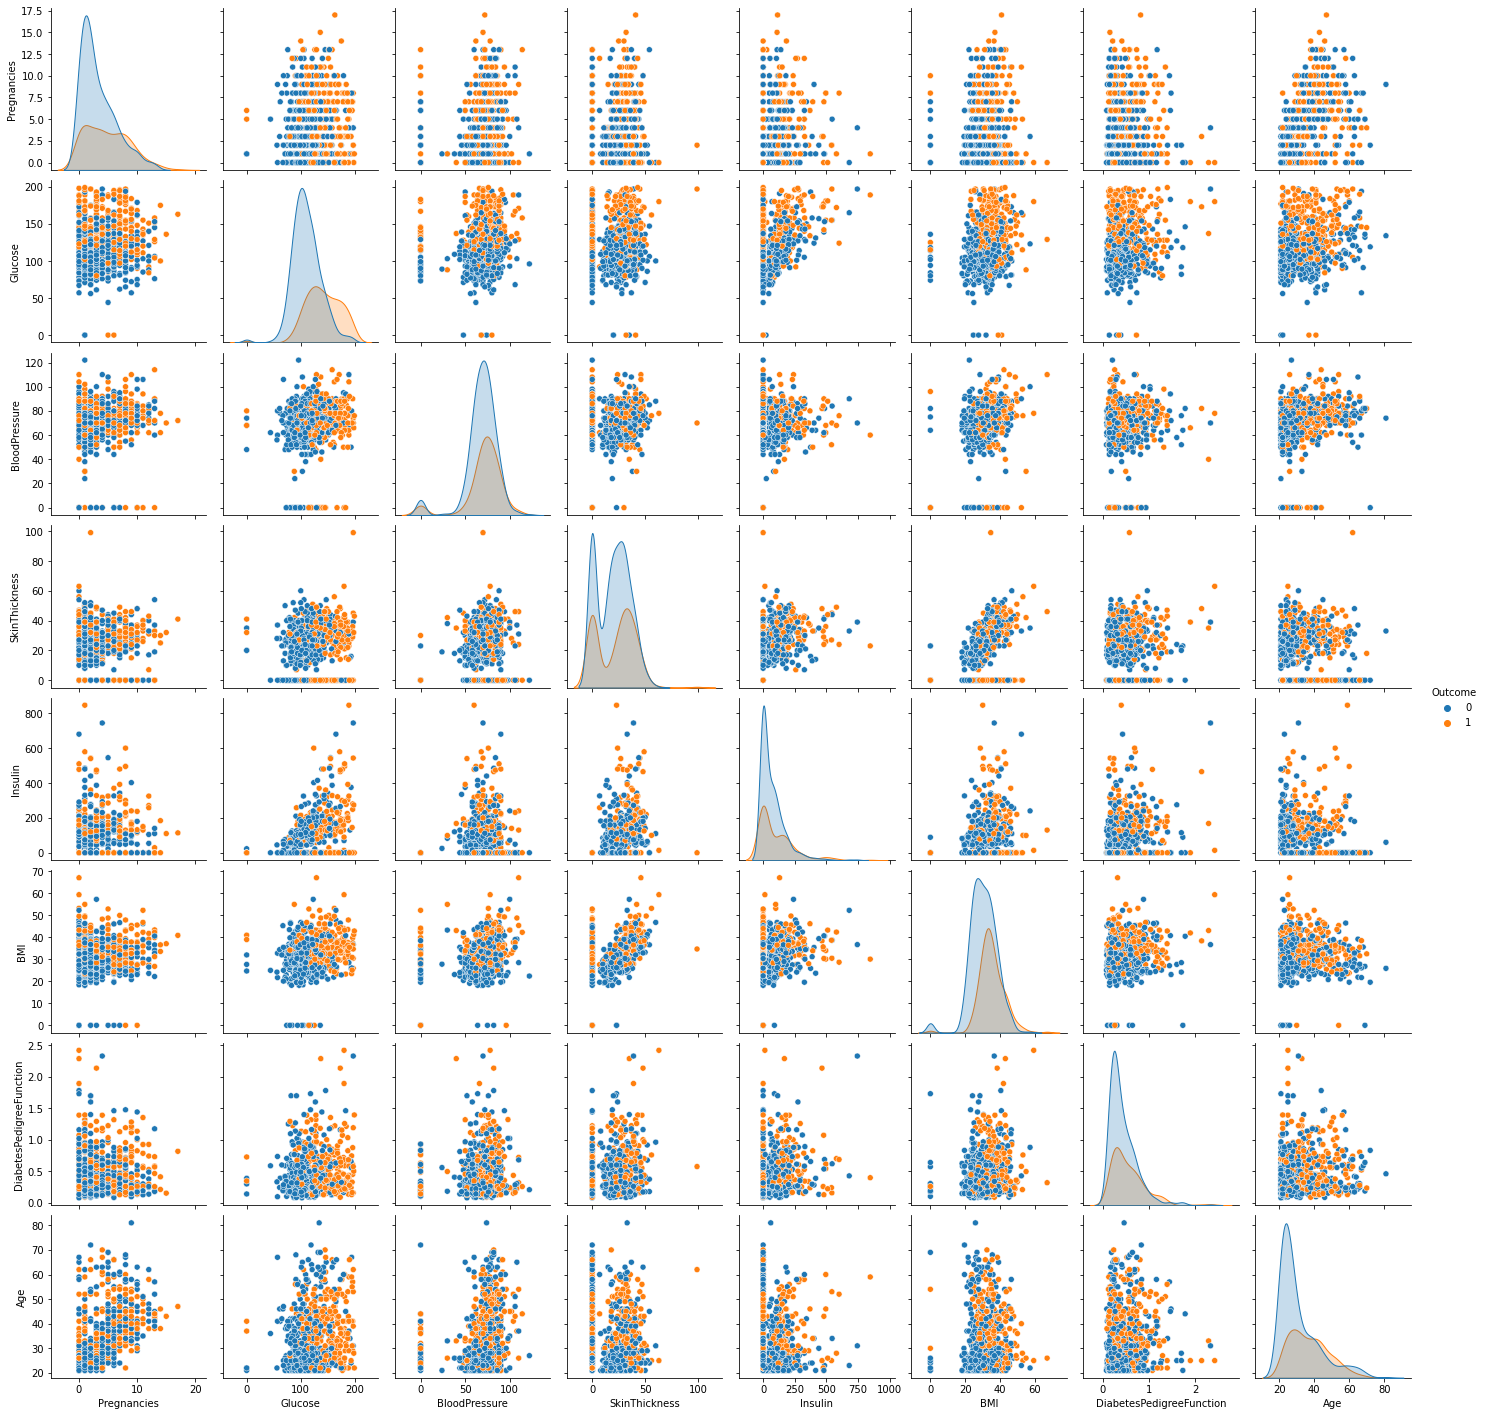

In [58]:
sns.pairplot(data = df, vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',	'Insulin', 'BMI', 
                                    'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.show()


**Observation:**



### 4. Data Preprocessing

#### *a. Removing Outliers*

In [10]:
# Outlier Detection and Treatment
# --------------------------------------

# 1. Normal distribution with outliers
#       a. Detection method: Z-score: below mean-3*(sigma) or above mean+3*(sigma) are outliers
#       b. Treatment: Capping. Every outlier will be cap to its closer 3sigma value. 

def outliers_normalDist(df, ft):

    for i in ft:
        
        #calulating 3_sigma limits 
        upper_limit = df[ft].mean() + 3*df[ft].std()
        lower_limit = df[ft].mean() - 3*df[ft].std()

        #capping outliers
        df[ft] = np.where(df[ft] < lower_limit, lower_limit,
            np.where(df[ft] > upper_limit, upper_limit,
                df[ft]
            )
        )

# 2. Skewed distribution with outliers:
#       a. Detection method: Inter-Quartile Range (IQR) proximity rule.
#       b. Treatment: Capping. Every outlier will be cap to its closer limit whisker (upper or lower limit)

def outliers_skewedDist(df, ft):

    for i in ft:
        
        #calculating percentiles values
        percentile25 = df[ft].quantile(0.25)
        percentile75 = df[ft].quantile(0.75)

        #calculating inter-quartile range
        iqr = percentile75 - percentile25

        #calculating whiskers limits
        lower_limit = percentile25 - 1.5 * iqr
        upper_limit = percentile75 + 1.5 * iqr

        #capping outliers
        df[ft] = np.where(df[ft] < lower_limit, lower_limit,
            np.where(df[ft] > upper_limit, upper_limit,
                df[ft]
            )
        )

outliers_normalDist(df, ['Glucose', 'BloodPressure', 'BMI'])
outliers_skewedDist(df, ['Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'])


**Observation:**

1. Variables 'Glucose', 'BloodPressure', 'BMI' outliers were set to +/- 3 times it's std, as variables distribution is normal.
2. Variables 'Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age' outliers have been matched to their corresponding whiskers limits, as their is normal.


#### *b. Dataset Normalization*

In [13]:
# Normalization
# --------------------------------------
# The goal of normalization is to change the values of numeric columns in the dataset to use a 
# common scale, without distorting differences in the ranges of values or losing information.
# The StandardScaler() is a function used to resize the distribution of values ​​so that the 
# mean of the observed values ​​is 0 and the standard deviation is 1. 

from scipy.stats import zscore
X = df.iloc[:,:-1].apply(zscore)
y = df['Outcome']


In [101]:
np.ptp(X, axis= 0)


Pregnancies                 4.039523
Glucose                     5.487521
BloodPressure               6.153384
SkinThickness               5.052283
Insulin                     7.345730
BMI                         6.018278
DiabetesPedigreeFunction    3.931182
Age                         3.915383
dtype: float64

**Observation:**

After normalization all variables’ values are in similar range. This helps to increase performance accuracy and processing time.


#### *c. dataframe 80 : 20 train test split*

In [16]:
# train_test_split
# --------------------------------------
# Split arrays or matrices into random train and test subsets.
# More info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13, stratify = y)

print("train_test_split")
print("--------------------------------------")
print("Train -> X_train : " + str(X_train.shape) + " | y_train : " + str(y_train.shape))
print("Test  -> X_test  : " + str(X_test.shape) + " | y_test  : " + str(y_test.shape))


train_test_split
--------------------------------------
Train -> X_train : (614, 8) | y_train : (614,)
Test  -> X_test  : (154, 8) | y_test  : (154,)


### 5. Model Building, Training and Testing

#### *Model performance metrics:*

In [21]:
# model performance evaluation
def model_Performance(model):
    
    # Training and testing prediction
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    # Accuracy score
    # The accuracy_score function computes the accuracy, either the fraction (default) 
    # or the count (normalize=False) of correct predictions. In multilabel classification, 
    # the function returns the subset accuracy. If the entire set of predicted labels for a 
    # sample strictly match with the true set of labels, then the subset accuracy is 1.0; 
    # otherwise it is 0.0.
    
    as_train = metrics.accuracy_score(y_train, pred_train)  
    as_test  = metrics.accuracy_score(y_test, pred_test)

    # F1 score
    # Also known as balanced F-score or F-measure. can be interpreted as a harmonic mean of the precision and 
    # recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative 
    # contribution of precision and recall to the F1 score are equal.
    
    f1_train = metrics.f1_score(y_train, pred_train)
    f1_test  = metrics.f1_score(y_test, pred_test)

    # Precision Score 
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp 
    # the number of false positives. The precision is intuitively the ability of the classifier 
    # not to label as positive a sample that is negative. 
    # The best value is 1 and the worst value is 0.

    ps_train = metrics.precision_score(y_train, pred_train)
    ps_test  = metrics.precision_score(y_test, pred_test)

    # Recall Score 
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples. 
    # The best value is 1 and the worst value is 0.

    re_train = metrics.recall_score(y_train, pred_train)
    re_test  = metrics.recall_score(y_test, pred_test)


    # printing performance matrics
    print('Model Perfromance: ' + str(model))
    print("--------------------------------------")
    print("Train data set ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_train, f1_train, ps_train, re_train))
    print("Test data set  ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_test, f1_test, ps_test, re_test))

# ploting feature's importance
def featureImportance_plot(model):
   
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

    #ploting feature importance chart
    plt.figure(figsize=(10, 5))
    sns.barplot(importance_df.Importance, importance_df.index)
    plt.title(str(model) + ' - Feature Importance')
    plt.xlabel('Coeficient Importance')
    

#### *a. K-Nearest Neighbords Classifier*

In [22]:
# KNeighborsClassifier
# --------------------------------------
# Is a non-parametric, supervised learning classifier, which uses proximity to 
# make classifications or predictions about the grouping of an individual data point

# Model definition and fitting
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)

# Model Performance
model_Performance(knnc)


Model Perfromance: KNeighborsClassifier()
--------------------------------------
Train data set ->  Accuracy: 0.827   |   F1 score: 0.735    |    Precision: 0.790    |   Recall: 0.687
Test data set  ->  Accuracy: 0.734   |   F1 score: 0.594    |    Precision: 0.638    |   Recall: 0.556


#### *b. Linear Support Vector Machine Classifier*

In [53]:
# LinearSVC
# --------------------------------------
# Applies a linear kernel function to perform classification. It performs well with a 
# large number of samples. Works with parameters L1 or L2 and loss function. 

# Model definition and fitting
lsvc = LinearSVC(C = 0.01)
lsvc.fit(X_train, y_train)

# Model Performance
model_Performance(lsvc)


Model Perfromance: LinearSVC(C=0.01)
--------------------------------------
Train data set ->  Accuracy: 0.775   |   F1 score: 0.637    |    Precision: 0.729    |   Recall: 0.565
Test data set  ->  Accuracy: 0.786   |   F1 score: 0.667    |    Precision: 0.733    |   Recall: 0.611


#### *c. Random Forest Classifier*

Model Perfromance: RandomForestClassifier(ccp_alpha=0.001, max_depth=15, max_features=5,
                       n_estimators=200, random_state=100)
--------------------------------------
Train data set ->  Accuracy: 1.000   |   F1 score: 1.000    |    Precision: 1.000    |   Recall: 1.000
Test data set  ->  Accuracy: 0.773   |   F1 score: 0.646    |    Precision: 0.711    |   Recall: 0.593


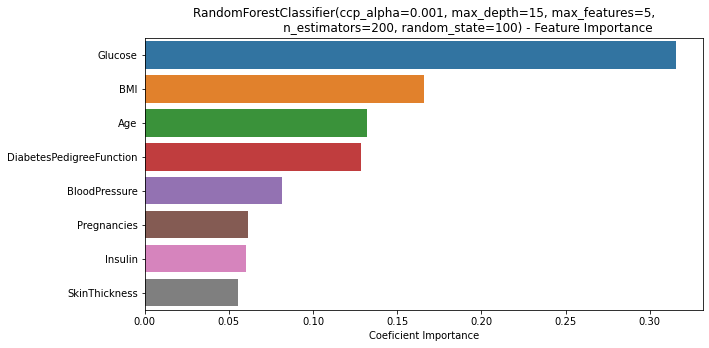

In [31]:
# RandomForestClassifier
# --------------------------------------
# it generates small decision trees using random subsamples of the dataset where the collection 
# of the generated decision tree is defined as forest. Every individual tree is created using 
# an attribute selection indicator such as entropy, information gain, etc. In classification, 
# problem voting is done by each tree and the most voted class is considered the final result 

# Model definition and fitting
rfc = RandomForestClassifier( ccp_alpha = 0.001, max_depth = 15, max_features = 5, n_estimators = 200, random_state = 100)
rfc.fit(X_train, y_train)

# Model Performance
model_Performance(rfc)
featureImportance_plot(rfc)


In [30]:
# RandomForestClassifier - GridSearchCV (Hyperparameters Tunning)
# --------------------------------------

# Defining parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200], 
    'max_depth': [15, 20], 
    'max_features': [5, 10],
    'ccp_alpha' : [0.1, 0.01, 0.001] 
    }

# Model definition and fitting
gsrfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 10)
gsrfc.fit(X_train,y_train)

# Model Performance
model_Performance(gsrfc)
print("best params : " + str(gsrfc.best_params_))


Model Perfromance: GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001], 'max_depth': [15, 20],
                         'max_features': [5, 10],
                         'n_estimators': [50, 100, 150, 200]})
--------------------------------------
Train data set ->  Accuracy: 1.000   |   F1 score: 1.000    |    Precision: 1.000    |   Recall: 1.000
Test data set  ->  Accuracy: 0.773   |   F1 score: 0.653    |    Precision: 0.702    |   Recall: 0.611
best params : {'ccp_alpha': 0.001, 'max_depth': 15, 'max_features': 5, 'n_estimators': 200}


#### *d. Decision Tree Classifier*

Model Perfromance: DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features=10)
--------------------------------------
Train data set ->  Accuracy: 0.814   |   F1 score: 0.749    |    Precision: 0.708    |   Recall: 0.794
Test data set  ->  Accuracy: 0.779   |   F1 score: 0.691    |    Precision: 0.679    |   Recall: 0.704


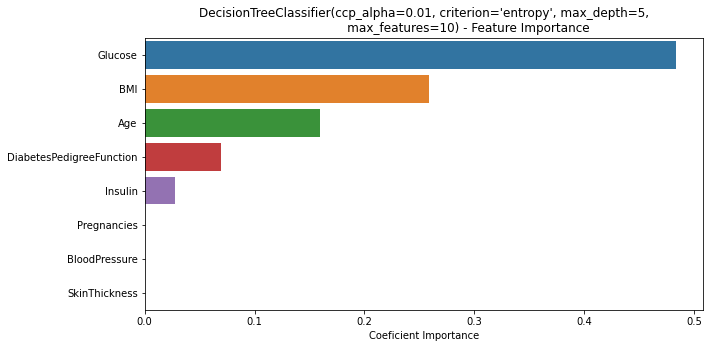

In [34]:
# DecisionTreeClassifier
# --------------------------------------
# A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), 
# the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a 
# decision tree is known as the root node. It learns to partition on the basis of the attribute value.

# Model definition and fitting
dtc = DecisionTreeClassifier(ccp_alpha = 0.01, criterion = 'entropy', max_depth = 5, max_features = 10, min_samples_split = 2)
dtc.fit(X_train, y_train)

# Model Performance
model_Performance(dtc)
featureImportance_plot(dtc)


In [32]:
# DecisionTreeClassifier - GridSearchCV (Hyperparameters Tunning)
# --------------------------------------

# Defining parameter grid
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3, 5, 7 , 9, None],
    'max_features' : [10, 15, 20],
    'min_samples_split' : [2, 4, 6, 9],
    'ccp_alpha' : [0.1, 0.01, 0.001] 
}

# Model definition and fitting
gsdtc = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 10, n_jobs = -1)
gsdtc.fit(X_train, y_train)

# Model Performance
model_Performance(gsdtc)
print("best params  : " + str(gsdtc.best_params_))


Model Perfromance: GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': [10, 15, 20],
                         'min_samples_split': [2, 4, 6, 9]})
--------------------------------------
Train data set ->  Accuracy: 0.814   |   F1 score: 0.749    |    Precision: 0.708    |   Recall: 0.794
Test data set  ->  Accuracy: 0.779   |   F1 score: 0.691    |    Precision: 0.679    |   Recall: 0.704
best params  : {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 2}


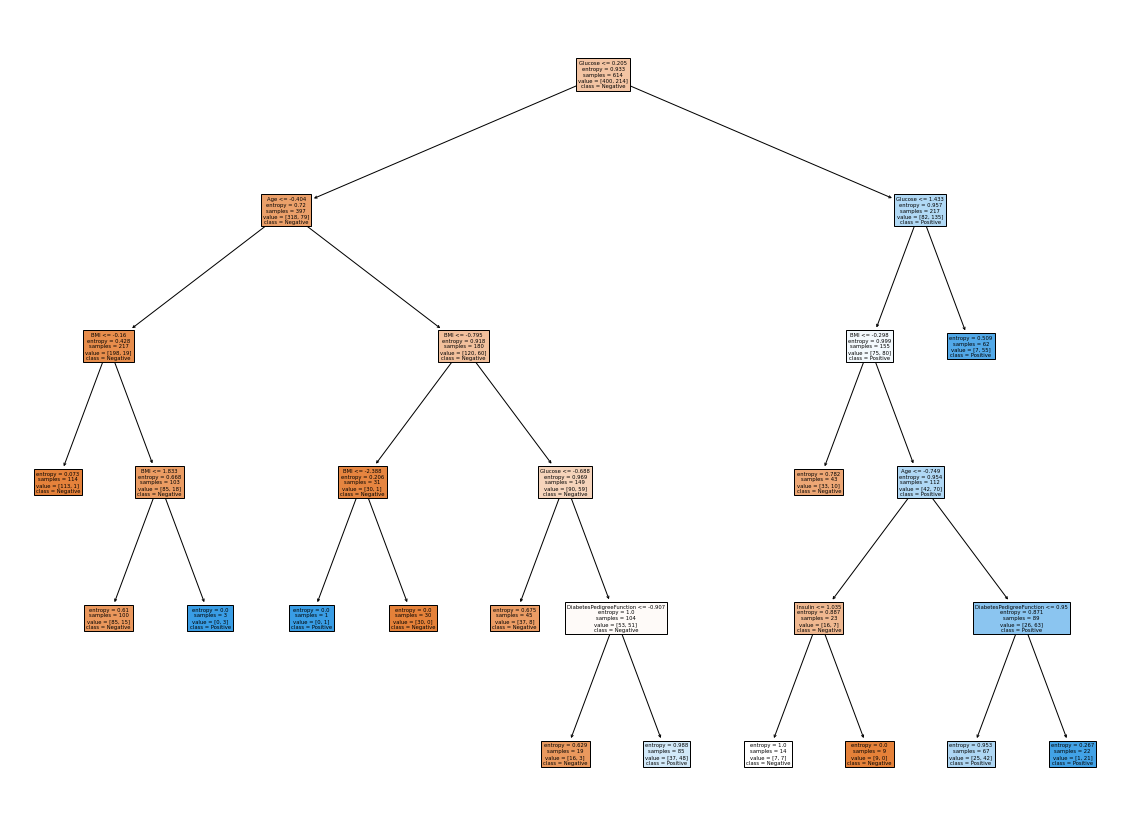

In [41]:
# Plotting Decision Tree
# --------------------------------------

fig = plt.figure(figsize=(20,15))
plot_tree(dtc, filled = True,
            feature_names = X_train.columns,
            class_names= ['Negative', 'Positive'])
plt.show();


### 6. Validation

In [83]:
# Cross-validation:
# --------------------------------------
# Cross-validation is a resampling method that uses n portions of the data to test and train 
# a model on n iterations. It is mainly used in settings where the goal is prediction, 
# and one wants to estimate how accurately a predictive model will perform in practice.
# More info: https://scikit-learn.org/stable/modules/cross_validation.html

print("Cross-validation")
print("--------------------------------------")
for clf, label in zip([knnc, lsvc, rfc, dtc], ['KNeighborsClassifier','SVR(linear)', 'RandomForestRegressor', 'DecisionTreeClassifier']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Cross-validation
--------------------------------------
Accuracy: 0.733 (+/- 0.017) [KNeighborsClassifier]
Accuracy: 0.770 (+/- 0.022) [SVR(linear)]
Accuracy: 0.760 (+/- 0.036) [RandomForestRegressor]
Accuracy: 0.716 (+/- 0.030) [DecisionTreeClassifier]


### 7. Results

**Model Decision Tree Classifier (dct) performs ok** with this dataset. Performance metrics are:

* Train data set ->  Accuracy: 0.814   |   F1 score: 0.749    |    Precision: 0.708    |   Recall: 0.794
* Test data set  ->  Accuracy: 0.779   |   F1 score: 0.691    |    Precision: 0.679    |   Recall: 0.704
* Cross Validation Accuracy: 0.716 (+/- 0.030) [DecisionTreeClassifier]

This *Accuracy* factor shows the model is able to predict 72% of observations. A Precision and Recall of also 70 aprox., indicate this model is correctly classifying labels at a good ratio.

**Predictors Glucose, BMI, and Age** are the most significant variables to predict Diabetes given this set of values.

Find below some charts to ilustrate de results:

a. Decision Tree 
b. Confusion Matrix
c. Feature Importance

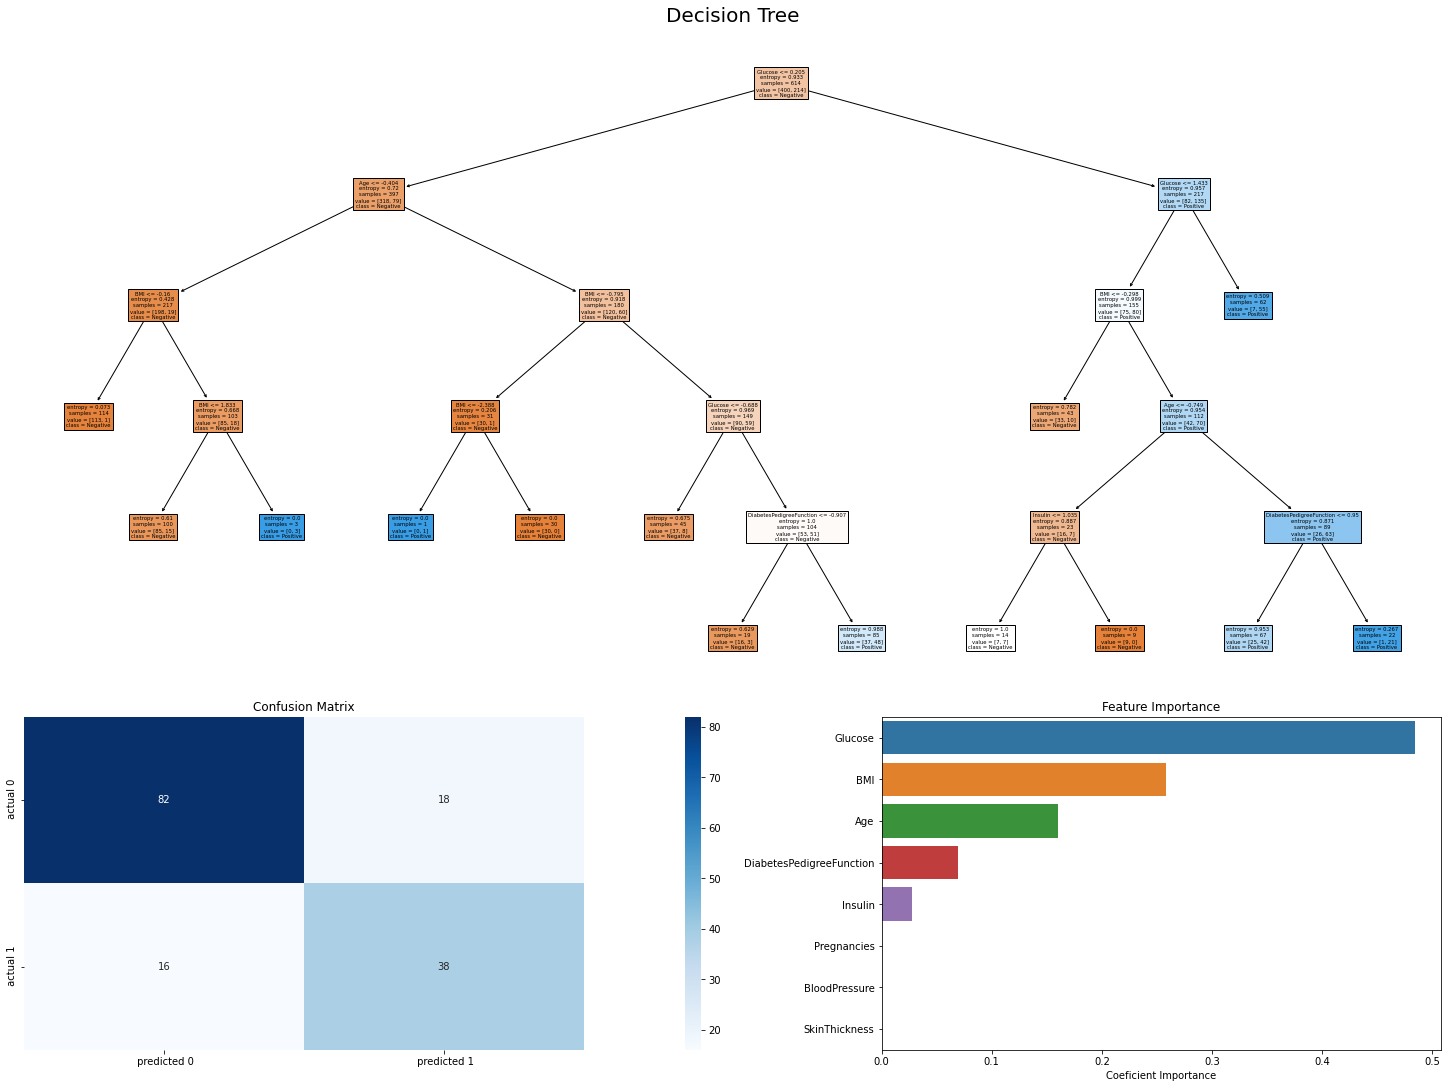

In [84]:

# Summary Results Grid Plott
# --------------------------------------

def summaryPlott(model, X, y):

    # Predicted target values
    y_pred = model.predict(X)

    fig = plt.figure(constrained_layout = True, figsize = (20,15))
    gs = GridSpec(3, 2, figure = fig)

    # Plott #1 Decision Tree
    # --------------------------------------
    ax1 = fig.add_subplot(gs[0:2, :])

    plot_tree(model, filled = True,
                feature_names = X.columns,
                class_names= ['Negative', 'Positive'])
    plt.title('Decision Tree', fontdict = {'fontsize' : 20})

    # Plott #2 Confusion Matrix
    # --------------------------------------
    ax2 = fig.add_subplot(gs[2, 0])
      
    labels = unique_labels(y)
    columns = [f' predicted {label}' for label in labels]
    index = [f' actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y, y_pred), columns = columns, index = index)
    sns.heatmap(table, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title('Confusion Matrix')

    # Plott #3 Feature Importance
    # --------------------------------------
    ax3 = fig.add_subplot(gs[2, 1])

    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

    #ploting feature importance chart
    sns.barplot(importance_df.Importance, importance_df.index)
    plt.title('Feature Importance')
    plt.xlabel('Coeficient Importance')

    # Save fig to imgs folder
    # --------------------------------------
    fig.savefig('./imgs/summary_plt.jpg')

    plt.show()

# Calling summaryPlot function
summaryPlott(dtc, X_test, y_test)
